In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# results = session.query(Measurement.date, Measurement.prcp).all()
# for row in results:
#     print(row)
#     print(row.date, row.prcp)
    
# session.query(session.query(Measurement.date, Measurement.prcp).all())    

In [12]:
#dateprcp = pd.DataFrame(results, columns = ['date', 'precipitation'])
# dateprcp

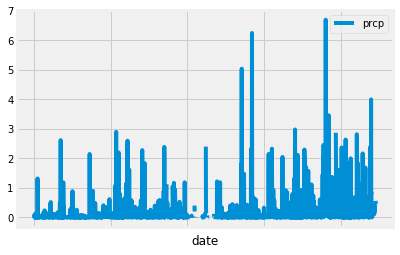

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#last12 = session.query(SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
#FROM measurement) http://localhost:8889/notebooks/Desktop/GW_Bootcamp_Repository/test/GWARL201902DATA3/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/Climate_Starter_2.ipynb#
#print(last12) 
# Calculate the date 1 year ago from the last data point in the database
yearago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#yearago
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= yearago).\
            all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_df = pd.DataFrame(results, columns = ['date', 'prcp'])
#last_12_df
# Sort the dataframe by date
last_12_df.sort_values('date')
last_12_df.set_index(last_12_df['date'], inplace = True)
last_12_df

# Use Pandas Plotting with Matplotlib to plot the data
last_12_df.plot(x_compat= True) 


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
 ##DataFrame.describe(percentiles=None, include=None, exclude=None)[source]
last_12_df.describe()    

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()
#session.query(Station.station).all()


[(9)]

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

mintemp = session.query(func.min(Measurement.tobs))
mintemp = list(mintemp)
print(f'The lowest temperature is {mintemp[0][0]} degrees.')

maxtemp = list(session.query(func.max(Measurement.tobs)))
print(f'The highest temperature is {maxtemp[0][0]} degrees.')

avgtemp = list(session.query(func.avg(Measurement.tobs)))
print(f'The average temperature is {avgtemp[0][0]} degrees.')
 

The lowest temperature is 53.0 degrees.
The highest temperature is 87.0 degrees.
The average temperature is 73.09795396419437 degrees.


In [19]:
# Choose the station with the highest number of temperature observations.

from sqlalchemy import desc


station_temp_counts = session.query(Measurement.station, func.count(Measurement.tobs).label('tobcount')).\
                    filter(Measurement.date > yearago).\
                    group_by(Measurement.station).\
                    order_by(desc('tobcount')).all()


list(station_temp_counts)

[('USC00519397', 360),
 ('USC00519281', 351),
 ('USC00516128', 348),
 ('USC00513117', 342),
 ('USC00519523', 336),
 ('USC00514830', 304),
 ('USC00517948', 182)]

In [21]:
 # Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stationcounts = session.query(Measurement.station,func.count(Measurement.station).label("statcount")).\
                    group_by(Measurement.station).\
                    order_by(desc("statcount")).\
                    all()
stationcounts

maxstation = stationcounts[0][0]
maxcounts = stationcounts[0][1]
print(maxstation, maxcounts)

USC00519281 2772


In [22]:
station_temps = session.query(Measurement.tobs).\
                     filter(Measurement.date > yearago).\
                     filter(Measurement.station ==  maxstation).\
                     all()

station_temps

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

In [23]:
temp_list=list()
frequency=list()
cntrows=0
for row in station_temps:
    cntrows+=1
    temp, = row
    temp_list.append(temp)

print(str(len(temp_list)))

351


In [24]:
temp_freq_dict={"Temperature":temp_list }
temp_freq_df=pd.DataFrame(temp_freq_dict)
temp_freq_df.head()

,Temperature
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


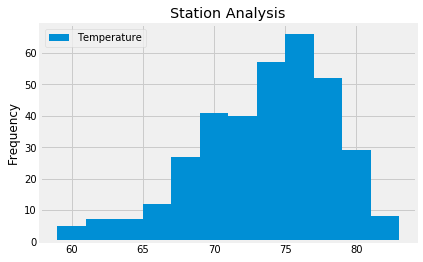

In [25]:
temp_freq_df.plot.hist(by="Temperature", bins=12,title="Station Analysis" )
plt.show()

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
arrival = dt.date(2018, 2, 1)
departure = dt.date(2018, 2, 14)
yearago = dt.timedelta(days=365)
temps_1 = (calc_temps((arrival-yearago), (departure-yearago)))
print(temps_1)


[(59.0, 69.35164835164835, 80.0)]


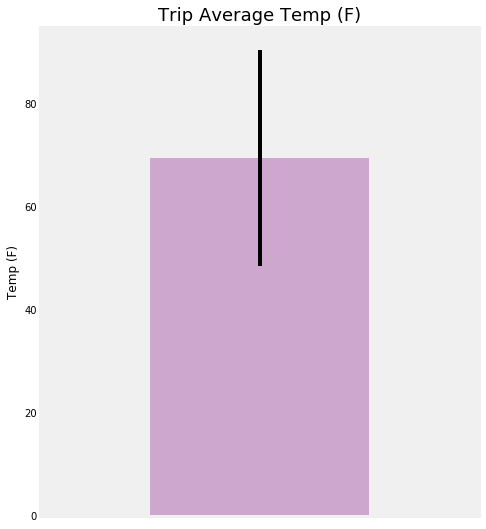

In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temps_1_df = pd.DataFrame(temps_1, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = temps_1_df['Avg Temp']
min_max_temp = temps_1_df.iloc[0]['Max Temp'] - temps_1_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', color = 'purple', yerr=min_max_temp, figsize=(7,9), alpha = 0.3)
plt.xticks([])
plt.grid()              
plt.title("Trip Average Temp (F)", fontsize=18)
plt.ylabel("Temp (F)")
plt.show()

In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = "2012-02-01"
end_date = "2012-02-14"


sel = [Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()

print(results)


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 2.5), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 1.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 1.14), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.8400000000000001), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.84), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.8), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.7100000000000001), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.44000000000000006), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.0)]
